<a href="https://colab.research.google.com/github/bertrand12345/Extracting-Stock-Data/blob/main/Extracting_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Extracting Stock Data Using a Python Library</h1>

A company's stock share is a piece of the company more precisely:
<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." </p></b>



In [ ]:
!pip install yfinance
!pip install matplotlib

In [ ]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data

Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.

In [ ]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2024-11-05 18:40:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2024-11-05 18:40:38 (840 MB/s) - ‘apple.json’ saved [5699/5699]



Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.

In [ ]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    #Print the type of data variable
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the <code>'country'</code> using the key country

In [ ]:
apple_info['country']

'United States'

### Extracting Share Price

A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [ ]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.

In [ ]:
apple_share_price_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
11062,2024-10-30 00:00:00-04:00,232.610001,233.470001,229.550003,230.100006,47070900,0.0,0.0
11063,2024-10-31 00:00:00-04:00,229.339996,229.830002,225.369995,225.910004,64370100,0.0,0.0
11064,2024-11-01 00:00:00-04:00,220.970001,225.350006,220.270004,222.910004,65276700,0.0,0.0
11065,2024-11-04 00:00:00-05:00,220.990005,222.789993,219.710007,222.009995,44903300,0.0,0.0
11066,2024-11-05 00:00:00-05:00,221.794998,223.945007,221.794998,223.020004,16037322,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.

In [ ]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:

<Axes: xlabel='Date'>

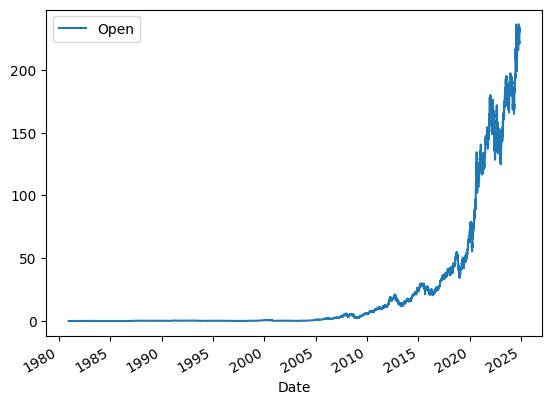

In [ ]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [ ]:
apple.dividends

,Dividends
Date,
1987-05-11 00:00:00-04:00,0.000536
1987-08-10 00:00:00-04:00,0.000536
1987-11-17 00:00:00-05:00,0.000714
1988-02-12 00:00:00-05:00,0.000714
1988-05-16 00:00:00-04:00,0.000714
...,...
2023-08-11 00:00:00-04:00,0.240000
2023-11-10 00:00:00-05:00,0.240000
2024-02-09 00:00:00-05:00,0.240000


We can plot the dividends overtime:

<Axes: xlabel='Date'>

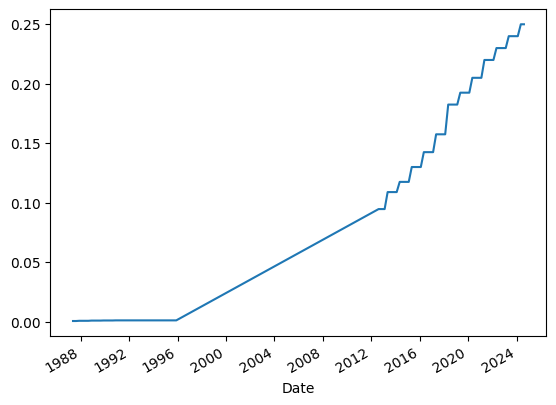

In [ ]:
apple.dividends.plot()

Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.

In [ ]:
amd = yf.Ticker("AMD")

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2024-11-05 19:23:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json’

amd.json            100%[===================>]   5.70K  --.-KB/s    in 0s      

2024-11-05 19:23:38 (1.13 GB/s) - ‘amd.json’ saved [5838/5838]



In [ ]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

Use the key  <code>'country'</code> to find the country the stock belongs to.

In [ ]:
amd_info['country']

'United States'

Use the key  <code>'sector'</code> to find the sector the stock belongs to

In [ ]:
amd_info['sector']

'Technology'

Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day

In [ ]:
amd_price = amd.history(period="max")
amd_price.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0


<h1>Extracting and Visualizing Stock Data2</h1>



In [2]:
!pip install bs4
!pip install nbformat

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Extract Stock Data

In [6]:
Data = yf.Ticker("TSLA")

In [9]:
tesla_data = Data.history(period="max")
tesla_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-30 00:00:00-04:00,258.040009,263.350006,255.820007,257.549988,53993600,0.0,0.0
2024-10-31 00:00:00-04:00,257.989990,259.750000,249.250000,249.850006,66575300,0.0,0.0
2024-11-01 00:00:00-04:00,252.039993,254.000000,246.630005,248.979996,57544800,0.0,0.0
2024-11-04 00:00:00-05:00,244.559998,248.899994,238.880005,242.839996,68802400,0.0,0.0
2024-11-05 00:00:00-05:00,247.339996,255.279999,246.210007,251.440002,66787000,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function.

In [10]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Use Webscraping to Extract Tesla Revenue Data

The `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.

In [14]:
df = []
payload = {"Date": [], "Revenue": []}
r = requests.get(URL, payload)
soup = BeautifulSoup(r.text, 'html.parser')


In [16]:
import pandas as pd

# Create an empty DataFrame with columns 'Date' and 'Revenue'
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])



In [19]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage containing the Tesla revenue table
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Make a GET request to fetch the page content
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')


In [20]:
# Find the table with a specific class or id
table = soup.find('table', {'class': 'quarterly-revenue-table'})


In [34]:
# Get all rows in the table (skip the header row)
rows = soup.find_all('tr')[1:]  # Skip the first row which is the header


In [24]:
# Get all rows in the table (skip the header row)
#rows = table.find_all('tr')[1]  # Skip the first row which is the header

rows = soup.find_all("tbody")[1]


In [29]:
# Loop through each row to extract the data
for row in rows:
    # Extract all columns (td elements) in the row
    cols = row.find_all('td')

    # If the row has at least 2 columns, extract Date and Revenue
    if len(cols) >= 2:
        date = cols[0].text.strip()  # Date is in the first column
        revenue = cols[1].text.strip()  # Revenue is in the second column

        # Append the extracted data to the DataFrame
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)


TypeError: object of type 'int' has no len()